# Import

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import time
import sys, os
os.chdir('../')

from tqdm import tqdm

from fashion_dataset.fashion_mnist_reader import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import *
from common.scheduling import one_cycle_lr_schedule

In [27]:
import os 
os.getcwd()

'c:\\Users\\Sangjin\\DL_scratch'

In [7]:
import os

os.chdir('/Users/Sangjin/DL_scratch/')

# Load Data

In [40]:
x_train, y_train = load_mnist(path='fashion_dataset/', kind='train')

x_test, y_test = load_mnist(path='fashion_dataset/', kind='t10k')

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 784), y_train shape: (60000,)
x_test shape: (10000, 784), y_test shape: (10000,)


In [47]:
x_train, y_train = load_mnist(path='fashion_dataset/', kind='train', normalize=False)

x_test, y_test = load_mnist(path='fashion_dataset/', kind='t10k')

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 784), y_train shape: (60000,)
x_test shape: (10000, 784), y_test shape: (10000,)


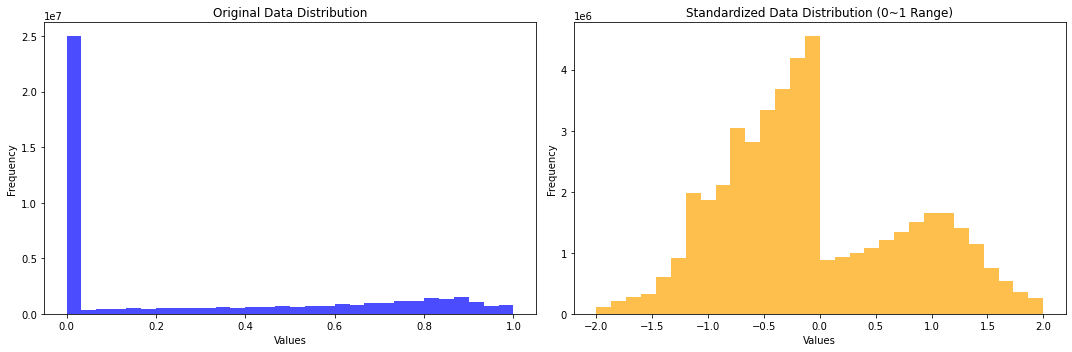

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_train)

# 히스토그램 그리기
plt.figure(figsize=(15, 5))

# 원본 데이터의 히스토그램
plt.subplot(1, 2, 1)
plt.hist(x_train.flatten(), bins=30, color='blue', alpha=0.7)
plt.title('Original Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

# 표준화된 데이터의 히스토그램
plt.subplot(1, 2, 2)
plt.hist(standardized_data.flatten(), bins=30, color='orange', alpha=0.7, range=(-2, 2))
plt.title('Standardized Data Distribution (0~1 Range)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

# Print the number of training and test datasets
print(f'{x_train.shape[0]} train set')
print(f'{x_test.shape[0]} test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

x_train shape: (60000, 784), y_train shape: (60000,)
60000 train set
10000 test set


In [16]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data, normalize=False):
    # Get the count for each label
    data = pd.Series(data).map(labels)
    label_counts = data.value_counts()

    return label_counts

get_classes_distribution(y_train)

Ankle Boot     6000
T-shirt/top    6000
Dress          6000
Pullover       6000
Sneaker        6000
Sandal         6000
Trouser        6000
Shirt          6000
Coat           6000
Bag            6000
dtype: int64

In [17]:
get_classes_distribution(y_test)

Ankle Boot     1000
Pullover       1000
Trouser        1000
Shirt          1000
Coat           1000
Sandal         1000
Sneaker        1000
Dress          1000
Bag            1000
T-shirt/top    1000
dtype: int64

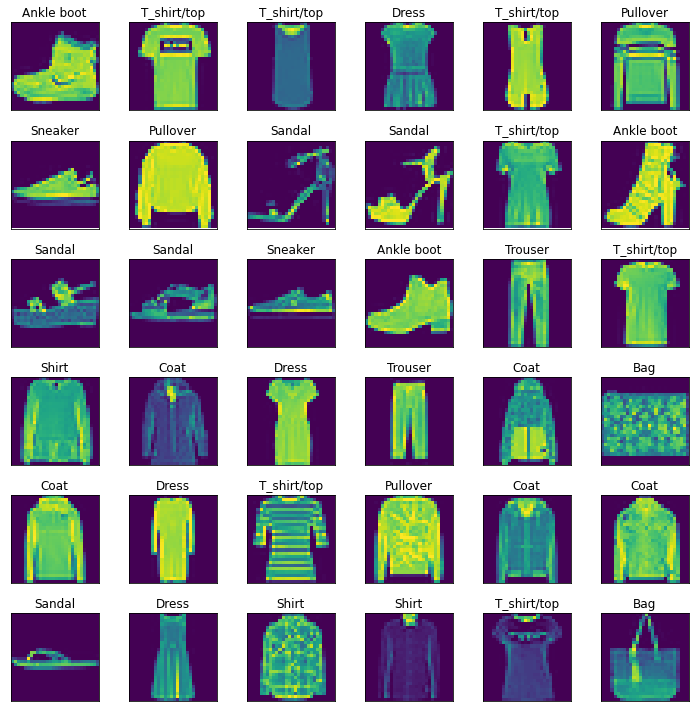

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])

plt.tight_layout()
plt.show()

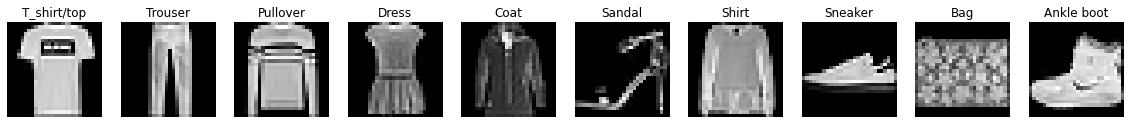

In [10]:
# 각 레이블에 해당하는 한 개의 이미지를 가져와서 한 줄로 출력
labels_to_display = list(range(10))  # 0부터 9까지의 레이블을 표시

fig, axs = plt.subplots(1, 10, figsize=(20, 2))  # 1행 10열의 subplot을 만듦

for i, label in enumerate(labels_to_display):
    # 해당 레이블의 첫 번째 이미지를 찾음
    index = next(idx for idx, value in enumerate(y_train) if value == label)
    
    # 이미지 출력
    axs[i].imshow(x_train[index], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'{class_names[label]}')

plt.show()

In [34]:
import pandas as pd

pd.read_excel('./total_result.xlsx', index_col=0).reset_index(drop=True)

,hidden_size_list,activation,weight_init_std,weight_decay_lambda,use_dropout,dropout_ratio,use_batchnorm,iters_num,batch_size,learning_rate,optimizer,train_acc,test_acc,time
0,"[512, 256, 128]",selu_tmp,xavier,0.000002,True,0.30,False,10000,512,0.01,Momentum,0.980167,0.9062,824.248010
1,"[256, 128]",selu_tmp,xavier,0.000000,True,0.25,False,10000,512,0.01,Momentum,0.978617,0.9057,346.187427
2,"[512, 256, 128]",elu,he,0.000000,False,NaN,True,10000,512,0.01,Nadam,1.000000,0.9038,949.484395
3,"[256, 64]",selu_tmp,xavier,0.000000,True,0.25,False,10000,512,0.01,Momentum,0.974417,0.9030,340.173420
4,"[256, 32]",selu_tmp,xavier,0.000000,True,0.25,False,10000,512,0.01,Momentum,0.970800,0.9025,340.128564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,"[128, 32]",elu,he,0.000000,True,0.50,False,10000,512,0.01,Momentum,0.853458,0.8415,41.790797
88,"[300, 150, 70]",sigmoid,xavier,0.000000,False,NaN,True,10000,256,0.01,SGD,0.864433,0.8388,182.931918
89,"[128, 32]",elu,he,0.000000,True,0.50,False,10000,512,0.01,Momentum,0.849437,0.8335,34.266119
90,"[200, 100, 50]",sigmoid,xavier,0.000000,False,NaN,True,10000,256,0.01,Adam,0.745667,0.7271,162.076558


# Experiment 

## DataFrame Init

In [7]:
result = pd.DataFrame(columns=['hidden_size_list', 'activation', 'weight_init_std', 'weight_decay_lambda', 
                                'use_dropout', 'dropout_ratio', 'use_batchnorm', 'iters_num', 'batch_size', 
                                'learning_rate', 'optimizer', 'train_acc', 'test_acc', 'time'])

In [4]:
import os

os.getcwd()

os.chdir('..')

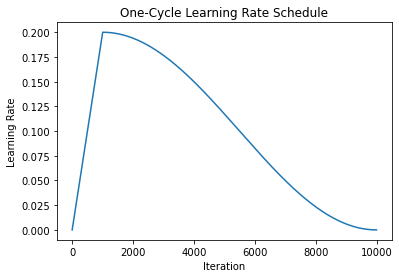

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from common.scheduling import one_cycle_lr_schedule

# Define parameters
total_iterations = 10000
max_lr = 0.2
warmup_fraction = 0.1

# Generate learning rates for each iteration
learning_rates = [one_cycle_lr_schedule(iteration, max_lr, total_iterations, warmup_fraction) for iteration in range(total_iterations)]

# Plot the learning rate schedule
plt.plot(range(total_iterations), learning_rates)
plt.title('One-Cycle Learning Rate Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()


## Run model

Learning progress:   0%|            | 4/10000 [00:01<39:54,  4.17it/s]

train acc, test acc | 0.156, 0.1534


Learning progress:  19%|=        | 1882/10000 [01:05<11:02, 12.25it/s]

train acc, test acc | 0.90815, 0.8762


Learning progress:  38%|===      | 3755/10000 [02:08<08:53, 11.72it/s]

train acc, test acc | 0.9340166666666667, 0.8884


Learning progress:  56%|=====    | 5630/10000 [03:11<06:56, 10.49it/s]

train acc, test acc | 0.9541833333333334, 0.8954


Learning progress:  75%|======   | 7504/10000 [04:13<05:05,  8.18it/s]

train acc, test acc | 0.969, 0.902


Learning progress:  94%|======== | 9378/10000 [05:18<01:18,  7.91it/s]

train acc, test acc | 0.9744833333333334, 0.9046


Learning progress: 100%|========| 10000/10000 [05:39<00:00, 29.49it/s]


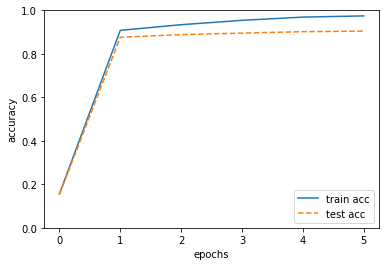

In [11]:
# seed 설정
np.random.seed(42)

# 데이터 읽기
x_train, t_train = load_mnist(path='fashion_dataset/', kind='train', normalize=True, one_hot_label=True)
x_test, t_test = load_mnist(path='fashion_dataset/', kind='t10k', normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[256, 64], output_size=10, activation='selu', weight_init_std='selu', 
                              use_batchnorm=False, use_dropout=True, dropout_ratio=0.25, weight_decay_lambda=2.108559297476214e-06)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 512   # 미니배치 크기
learning_rate = 0.2

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

optimizer = Momentum(lr=learning_rate)

start_time = time.time()

for i in tqdm(range(iters_num), desc='Learning progress', ncols=70, ascii=' =', leave=True):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch, t_batch = x_train[batch_mask], t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    lr = one_cycle_lr_schedule(i, max_lr=learning_rate, total_iterations=iters_num)
    optimizer.lr = lr
    optimizer.update(network.params, grad)

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"train acc, test acc | {train_acc}, {test_acc}")

end_time = time.time()
training_time = end_time - start_time

# Assuming network is an instance of the MultiLayerNetExtend class
network_info = {
    'hidden_size_list': network.hidden_size_list,
    'activation': network.layers['Activation_function1'].__class__.__name__.lower(),
    'weight_init_std': 'he' if network.layers['Activation_function1'].__class__.__name__.lower() in ('relu', 'elu') else 'xavier',
    'weight_decay_lambda': network.weight_decay_lambda,
    'use_dropout': network.use_dropout,
    'dropout_ratio': network.layers['Dropout1'].dropout_ratio if network.use_dropout else None,
    'use_batchnorm': network.use_batchnorm,
    'iters_num': iters_num,
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'optimizer': optimizer.__class__.__name__,
    'train_acc': network.accuracy(x_train, t_train),
    'test_acc': network.accuracy(x_test, t_test),
    'time': training_time 
}

result = pd.concat([result, pd.DataFrame([network_info])])

# 그래프 그리기
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Hyperparameter tuning

Learning progress: 100%|==========| 1000/1000 [01:43<00:00,  9.65it/s]


(train acc: 0.928375, valid acc: 0.8878333333333334) | weight decay: 6.020991903738259e-08


Learning progress: 100%|==========| 1000/1000 [01:52<00:00,  8.91it/s]


(train acc: 0.9253125, valid acc: 0.8860833333333333) | weight decay: 2.994715876079184e-06


Learning progress: 100%|==========| 1000/1000 [01:50<00:00,  9.06it/s]


(train acc: 0.9074166666666666, valid acc: 0.87625) | weight decay: 7.855914588019412e-06


Learning progress: 100%|==========| 1000/1000 [01:56<00:00,  8.61it/s]


(train acc: 0.9305208333333334, valid acc: 0.8918333333333334) | weight decay: 5.934726196444554e-07


Learning progress: 100%|==========| 1000/1000 [01:52<00:00,  8.88it/s]


(train acc: 0.9285416666666667, valid acc: 0.8868333333333334) | weight decay: 2.2167598465839503e-07


Learning progress: 100%|==========| 1000/1000 [01:54<00:00,  8.70it/s]


(train acc: 0.9209166666666667, valid acc: 0.881) | weight decay: 4.45563082275952e-08


Learning progress: 100%|==========| 1000/1000 [01:27<00:00, 11.47it/s]


(train acc: 0.9312291666666667, valid acc: 0.8920833333333333) | weight decay: 2.008200346026684e-07


Learning progress: 100%|==========| 1000/1000 [01:30<00:00, 11.01it/s]


(train acc: 0.9326875, valid acc: 0.8911666666666667) | weight decay: 2.007712765963896e-07


Learning progress: 100%|==========| 1000/1000 [01:55<00:00,  8.67it/s]


(train acc: 0.9197708333333333, valid acc: 0.88375) | weight decay: 1.393546942970559e-07


Learning progress: 100%|==========| 1000/1000 [01:50<00:00,  9.01it/s]


(train acc: 0.9257083333333334, valid acc: 0.8874166666666666) | weight decay: 2.6139565619750825e-07
=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.8920833333333333) | weight decay: 2.008200346026684e-07
Best-2(val acc:0.8918333333333334) | weight decay: 5.934726196444554e-07
Best-3(val acc:0.8911666666666667) | weight decay: 2.007712765963896e-07
Best-4(val acc:0.8878333333333334) | weight decay: 6.020991903738259e-08
Best-5(val acc:0.8874166666666666) | weight decay: 2.6139565619750825e-07
Best-6(val acc:0.8868333333333334) | weight decay: 2.2167598465839503e-07
Best-7(val acc:0.8860833333333333) | weight decay: 2.994715876079184e-06
Best-8(val acc:0.88375) | weight decay: 1.393546942970559e-07
Best-9(val acc:0.881) | weight decay: 4.45563082275952e-08
Best-10(val acc:0.87625) | weight decay: 7.855914588019412e-06


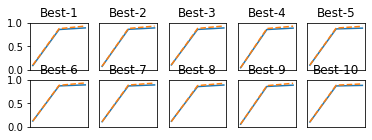

In [ ]:
from common.util import shuffle_dataset
np.random.seed(42)

def random_hyperparams():
    # dropout_ratio = np.random.uniform(0.2, 0.5)
    weight_decay_lambda = 10 ** np.random.uniform(-8, -5)
    # return dropout_ratio, weight_decay_lambda
    return weight_decay_lambda

# def initialize_network(dropout_ratio, weight_decay_lambda):
def initialize_network(weight_decay_lambda):
    return MultiLayerNetExtend(
        input_size=784, hidden_size_list=[256, 32], output_size=10,
        activation='elu', weight_init_std='elu',
        use_batchnorm=True, use_dropout=False,weight_decay_lambda=weight_decay_lambda
    )

def train_network(network, x_train, t_train, x_val, t_val, iters_num=1000, batch_size=512):
    optimizer = Nadam(lr=0.01)
    iter_per_epoch = max(x_train.shape[0] / batch_size, 1)

    train_loss_list = []
    train_acc_list = []
    valid_acc_list = []

    for i in tqdm(range(iters_num), desc='Learning progress', ncols=70, ascii=' =', leave=True):
        batch_mask = np.random.choice(len(x_train), batch_size)
        x_batch, t_batch = x_train[batch_mask], t_train[batch_mask]

        grad = network.gradient(x_batch, t_batch)
        lr = one_cycle_lr_schedule(i, max_lr=0.2, total_iterations=iters_num)
        optimizer.lr = lr
        optimizer.update(network.params, grad)

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            valid_acc = network.accuracy(x_val, t_val)
            train_acc_list.append(train_acc)
            valid_acc_list.append(valid_acc)

    return train_acc_list, valid_acc_list

def plot_results(results_train, results_val):
    print("=========== Hyper-Parameter Optimization Result ===========")
    graph_draw_num = 20
    col_num = 5
    row_num = int(np.ceil(graph_draw_num / col_num))
    i = 0

    for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
        print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

        plt.subplot(row_num, col_num, i+1)
        plt.title("Best-" + str(i+1))
        plt.ylim(0.0, 1.0)
        if i % 5: plt.yticks([])
        plt.xticks([])
        x = np.arange(len(val_acc_list))
        plt.plot(x, val_acc_list)
        plt.plot(x, results_train[key], "--")
        i += 1

        if i >= graph_draw_num:
            break

    plt.show()

# 데이터 로드 및 분할
x_train, t_train = load_mnist(path='fashion_dataset/', kind='train', normalize=True, one_hot_label=True)
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val, t_val = x_train[:validation_num], t_train[:validation_num]
x_train, t_train = x_train[validation_num:], t_train[validation_num:]

# 실험 횟수
num_experiments = 10
results_val = {}
results_train = {}

for _ in range(num_experiments):
    '''dropout_ratio, weight_decay_lambda = random_hyperparams()
    network = initialize_network(dropout_ratio, weight_decay_lambda)'''
    weight_decay_lambda = random_hyperparams()
    network = initialize_network(weight_decay_lambda)
    
    train_acc_list, valid_acc_list = train_network(network, x_train, t_train, x_val, t_val)
    
    # key = f"weight decay: {str(weight_decay_lambda)}, dropout_ratio: {str(dropout_ratio)}"
    key = f"weight decay: {str(weight_decay_lambda)}"
    
    results_val[key] = valid_acc_list
    results_train[key] = train_acc_list

    print(f'(train acc: {train_acc_list[-1]}, valid acc: {valid_acc_list[-1]}) | {key}')

plot_results(results_train, results_val)


In [22]:
result

,hidden_size_list,activation,weight_init_std,weight_decay_lambda,use_dropout,dropout_ratio,use_batchnorm,iters_num,batch_size,learning_rate,optimizer,train_acc,test_acc,time
0,"[256, 64]",selu_tmp,xavier,0.000002,True,0.25,False,10000,512,0.2,Momentum,0.974467,0.9045,349.790528


# Test

In [13]:
x_comp = np.load('./Project/test file/x_test.npy')
t_comp = np.load('./Project/test file/t_test.npy')

x_comp = x_comp.astype(np.float32)
x_comp = (x_comp - x_comp.mean()) / x_comp.std()

network.accuracy(x_comp, t_comp)

1.0

In [14]:
from keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

x_test = x_test.astype(np.float32).reshape(x_test.shape[0], -1)
x_test = (x_test - x_comp.mean()) / x_test.std()

network.accuracy(x_test, t_test)

Using TensorFlow backend.


0.8019

# Save Model

In [15]:
import pickle

with open('./Project/final_model.pkl', 'wb') as f:
    pickle.dump(network, f)